# Boston Airbnb Data Analysis

This jupyter notebook will show the process in making the analysis in this Medium:
https://medium.com/@pasha.putra/this-airbnb-data-will-make-you-understand-the-boston-renting-business-50e3f4c6a068

###### Header

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# import AllTogether as t
import seaborn as sns
%matplotlib inline
import datetime as dt

#To get the whole picture of Data Collumns
pd.options.display.max_columns = None
#pd.options.display.max_rows = None


###### Data Gathering. Source: https://www.kaggle.com/airbnb/boston

In [2]:

df_lis_boston = pd.read_csv('./data_set/boston_listings.csv')
df_cal_boston = pd.read_csv('./data_set/boston_calendar.csv')
df_rev_boston = pd.read_csv('./data_set/boston_reviews.csv')


##### Assessing The data
This code is showing how many Null Values in the data & show what columns is available in dataset

In [3]:
#check the collumn data availability
df_lis_boston.isna().mean().sort_values(ascending=False)

neighbourhood_group_cleansed        1.000000
jurisdiction_names                  1.000000
license                             1.000000
has_availability                    1.000000
square_feet                         0.984379
monthly_price                       0.752301
weekly_price                        0.751185
security_deposit                    0.625662
notes                               0.550907
interaction                         0.433473
access                              0.415342
neighborhood_overview               0.394700
host_about                          0.365132
transit                             0.359833
house_rules                         0.332497
cleaning_fee                        0.308787
space                               0.294840
review_scores_accuracy              0.229568
review_scores_location              0.229289
review_scores_value                 0.229010
review_scores_checkin               0.228731
review_scores_cleanliness           0.228173
review_sco

In [4]:
df_cal_boston.isna().mean().sort_values(ascending=False)

price         0.508716
available     0.000000
date          0.000000
listing_id    0.000000
dtype: float64

In [5]:
df_rev_boston.isna().mean().sort_values(ascending=False)

comments         0.000776
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

In [ ]:
#The Listing Data still contains Null Data which we have to take note in building model

____


## Business Question
These are the business question that are going to answer through the data analysis
1. How's the Availability Rate & Number of Unit in Boston Throughout the year? Segment Monthly
2. What impacting the Room Price in Boston?
3. How is the Availability Percentage between Area? Any Correlation with Expensive area and availability?

___

### 1. How's the Availability Rate & Number of Unit in Boston Throughout the year?

###### Business Understanding
This question is seeking an answer on how available the room night in Boston. Therefore we will use the Calendar data set since it shows how the daily availability of roomnight in Boston. We will manipulate it to get monthly availability in Boston.



##### Data Understanding

In [6]:
df_cal_boston.head(3)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN


###### Data Preparation
Since the daily analysis will cause to many variance. We will set up another **month** column by subseting the **date** column

In [7]:
#create month
df_cal_boston['month']=df_cal_boston['date'].map(lambda x: x[:7])

To make our life easy, I will create **available** column to a bollean type 

In [9]:
#create boolean availability
df_cal_boston['available_bol'] = df_cal_boston['available'].map(lambda x: x=='t')

In [12]:
df_cal_boston.head(3)

,listing_id,date,available,price,month,available_bol
0,12147973,2017-09-05,f,NaN,2017-09,False
1,12147973,2017-09-04,f,NaN,2017-09,False
2,12147973,2017-09-03,f,NaN,2017-09,False


Check the overal availability in Boston before split into Monthly

In [10]:
print('Overall Availability Room Night Percentage Boston:','%.2f' %df_cal_boston['available_bol'].mean())

Overall Availability Room Night Percentage Boston: 0.49


###### Data Modeling

This step we will calculate the availability rate in each month by using groupby and average of availability bollean. This will let us understand the rate availability in each month

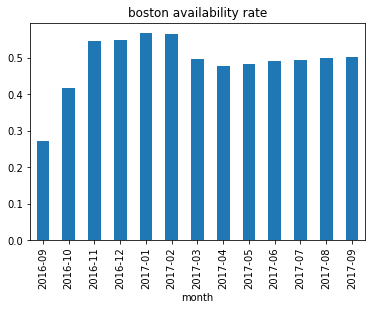

In [14]:
## Check Boston Monthly Roomnight Availbility Rate & Numbers 
boston_monthly_availability_rate=df_cal_boston.groupby('month')['available_bol'].mean()

## Check the Availability Percentage & Total Room Night in Boston
(boston_monthly_availability_rate).plot(kind="bar");
plt.title("boston availability rate");

Next step we will calculate the  total room night (regardless available or not) in each month by using groupby and count the row. This will help us understand the universe of roomnight.

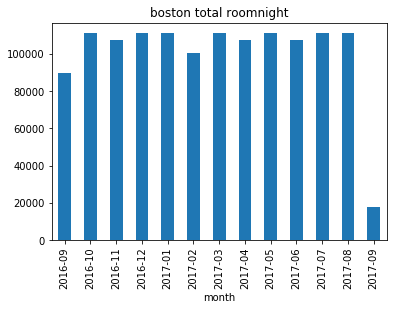

In [17]:
boston_monthly_roomnight=df_cal_boston.groupby('month')['available_bol'].count()
(boston_monthly_roomnight).plot(kind="bar");
plt.title("boston total roomnight");

###### Data Evaluation
From the **boston total roomnight** chart , the data seems quite stable around 100000 roomnight monthly. Fluctuation might happen because of the differences in month length (30 or 31). This shows that there are no new listings in AirBnb through the year, or the rate of dropping the listing and adding new listing is the same.

From the **boston availability rate** chart , the data shows that in Boston the availability drop in September & May (Ignore the Sep2017 as the data is incomplete) 
I hypothesis that September is the starting of School term, which many students and parent look for a room to stay
While in May is usually the Graduation date, where family usually come to boston to attend the graduation










____________________

### 2. What fator is determining Room Price in Boston?

###### Business Understanding

To answer this question we will apply Linear Regression model on the Listing Data since the data itself is consisted all variable that we need in determining the room prices in Boston.

After the model is built we will check which variable is the most determining of the prices. In which it will be the answer on what determines Room Price in Boston.

###### Data Understanding
If we see from the data set below, it contains 3585 rows and 95 columns. There are consist of free text column, numbers, and categorical type

In [20]:
df_lis_boston.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [22]:
df_lis_boston.shape

(3585, 95)

###### Data Preparation
We set up Linear Regression variable as following:

1. Dependent Variable y: **price**
2. Independent Variables X: **the rest of columns**

**Prepare Dependent Variable y**

As the price column is written with Dollar character $200 we have handle it and convert it to float. And check wether we have NULL values or not

In [23]:
#Price as the output
y= df_lis_boston['price']

#Convert y to float
y=y.replace('[\$,]', '', regex=True).astype(float)

In [129]:
#Check is y have null value
y.isna().sum()

0

**Prepare Independent Variables X**

Get all variables other than price

In [24]:
# Set up X for the rest columns
X= df_lis_boston.drop(columns='price')

X.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindal

We have to handle currency data to float and percentage data to float

In [25]:
# Convert All the price columns to float
X[['weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']]=X[['weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].replace('[\$,]', '', regex=True).astype(float)

# Convert percentage data to float
X['host_response_rate']= X['host_response_rate'].str.rstrip('%').astype('float') / 100.0
X['host_acceptance_rate']= X['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

Next we will handle the categorical columns. We will only pick the categorical columns that don't have many variability. Here we only pick that have less than or equal 500 different data

In [26]:
#Get Categorical Collumns
X_cat_col = X.select_dtypes(include='object').columns

# Drop columns if the categorical variable is too many; to increase performance
for k, v in X[X_cat_col].nunique().to_dict().items():
    if v>500:
        X=X.drop(columns=k)

In [27]:
#Get Categorical Collumns
X_cat_col = X.select_dtypes(include='object').columns

Next we clean unnecessary data in the categorical columns & check what's the remaining columns

In [28]:
#Drop the date columns
X = X.drop(columns=['last_scraped','last_review'])

# Drop Null Values
X=X.dropna(how='all',axis=1)

# Drop Unrelated Collumns
X = X.drop(columns=['id','scrape_id','host_id'])

# Drop The List Like data
X = X.drop(columns='host_verifications')

# Drop Neighbourhood data as it covered by cleansed_neighbourhood
X = X.drop(columns='neighbourhood')

#drop because a duplicate with other column listing_count
X=X.drop(columns='host_listings_count')

# Final Check Categorical Columns
X_cat_col = X.select_dtypes(include='object').columns
X[X_cat_col]

,experiences_offered,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,calendar_updated,calendar_last_scraped,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,none,"Boston, Massachusetts, United States",NaN,f,Roslindale,t,f,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Entire home/apt,Real Bed,2 weeks ago,2016-09-06,f,f,moderate,f,f
1,none,"Boston, Massachusetts, United States",within an hour,f,Roslindale,t,t,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Private room,Real Bed,a week ago,2016-09-06,f,t,moderate,f,f
2,none,"Boston, Massachusetts, United States",within a few hours,t,Roslindale,t,t,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Private room,Real Bed,5 days ago,2016-09-06,f,f,moderate,t,f
3,none,"Boston, Massachusetts, United States",within a few hours,f,NaN,t,f,Roslindale,Boston,MA,NaN,Boston,"Boston, MA",US,United States,f,House,Private room,Real Bed,a week ago,2016-09-06,f,f,moderate,f,f
4,none,"Boston, Massachusetts, United States",within an hour,t,Roslindale,t,t,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Private room,Real Bed,2 weeks ago,2016-09-06,f,f,flexible,f,f
5,none,"Boston, Massachusetts, United States",within a few hours,t,Roslindale,t,t,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Condominium,Private room,Real Bed,2 weeks ago,2016-09-06,f,f,flexible,f,f
6,none,"Milton, Massachusetts, United States",within an hour,f,Roslindale,t,t,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,f,Apartment,Entire home/apt,Real Bed,3 days ago,2016-09-06,f,f,strict,f,f
7,none,"Boston, Massachusetts, United States",within a few hours,t,Roslindale,t,t,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Private room,Real Bed,yesterday,2016-09-06,f,f,moderate,t,t
8,none,"Boston, Massachusetts, United States",within an hour,t,Roslindale,t,t,Roslindale,Roslindale,MA,02131,Boston,"Roslindale, MA",US,United States,t,Condominium,Private room,Real Bed,today,2016-09-06,f,f,moderate,f,f
9,none,"Boston, Massachusetts, United States",within an hour,t,Roslindale,t,t,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Entire home/apt,Real Bed,today,2016-09-06,f,f,strict,f,f


The Categorical Data is ready.

Next we will fill the null for the numerical data with the average of each column

In [31]:
# Handle Numerical Columns
X_num_col = X.select_dtypes(exclude='object').columns

X[X_num_col] = X[X_num_col].fillna(X[X_num_col].mean())

Next we will create dummy Variable for categorical columns

In [32]:
# Create Dummies For Categorical Variable
X_cat_col = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, prefix=X_cat_col,dummy_na=False,drop_first=True)

Now, final check the data structure

In [33]:
print(X.shape)

(3585, 471)


In [34]:
print(y.shape)

(3585,)


We are good to start the Linear Regression Model

###### Data Modeling
Here's the setup for the linear regression Model

In [35]:
# Initiate Function
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

cutoffs here pertains to the number of missing values allowed in the used columns.
Therefore, lower values for the cutoff provides more predictors in the model.

In [37]:
cutoffs = [3000, 1200,1100,1000,200,10,0]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs,plot=False)


In [38]:
r2_scores_test

[-28.294388871975276,
 -13.70815184922027,
 -13.70815184922027,
 -13.70815184922027,
 -168.80124382777836,
 -5.85080383686219e+21,
 -4.086518744956191e+27]

In [39]:
r2_scores_train

[0.3700049796922372,
 0.3929442071197692,
 0.3929442071197692,
 0.3929442071197692,
 0.4251895092456429,
 0.5069075503057745,
 0.54637931116169]

placing all variable create better r2 for the test model; 
Now let's check the top 40 variable that correlate with price

In [40]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(40)

,est_int,coefs,abs_coefs
3,latitude,708.498695,708.498695
39,room_type_Private room,-51.269074,51.269074
40,bed_type_Real Bed,42.269388,42.269388
34,host_has_profile_pic_t,36.126083,36.126083
5,bathrooms,28.501316,28.501316
1,host_acceptance_rate,26.127123,26.127123
6,bedrooms,24.943912,24.943912
36,city_Boston,15.937756,15.937756
37,"smart_location_Boston, MA",15.937756,15.937756
41,cancellation_policy_strict,-15.400053,15.400053


Try to build the model by top 40 performing variable

In [41]:
select_variable = coef_df.head(40)['est_int'].values

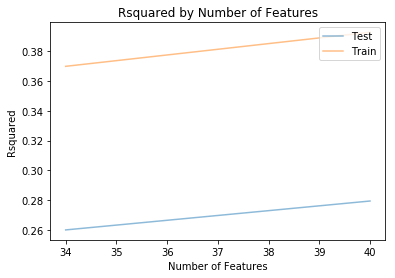

In [42]:


cutoffs = [3000, 1200,1100,1000,200,10,0]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X[select_variable], y, cutoffs)


###### Evaluate the Results
From the Linear Regression, it can be seen that the latitude possitively collerated with the price.
It seems the northen part of boston is more expensive compare to southern part.

And the top 5 variable that affect the price is 
1. latitude
2. room_type_Private room
3. bed_type_Real Bed
4. host_has_profile_pic_t
5. bathrooms	

___

### 3. How is the Availability Percentage between Area? Any Correlation with Expensive area and availability?

##### Business Understanding
The question can be answered by looking on the availability within area. In listing data there's availability columns within time range. It can be our data point in checking the Area.

The average of listing availability in each region will be the basis on how available in each area.
The availability has to be normalise with the time period to understand the availability rate.

To answer the second queation we will have to plot the data of price & availability and get the insight from the fitted line.




##### Data Understanding
Same as above we will be using Boston Listing data. To focus with we will only use following variable:

In [44]:
df_3 = df_lis_boston.copy()

In [46]:
df_3[['neighbourhood_cleansed','availability_30','availability_60','availability_90','availability_365','price']].head()

,neighbourhood_cleansed,availability_30,availability_60,availability_90,availability_365,price
0,Roslindale,0,0,0,0,$250.00
1,Roslindale,26,54,84,359,$65.00
2,Roslindale,19,46,61,319,$65.00
3,Roslindale,6,16,26,98,$75.00
4,Roslindale,13,34,59,334,$79.00


##### Prepare Data
The price we will handle to make it as float.
Next we will average the data based on area using groupby funtion then
we add additional column to get the availability rate.

In [47]:
#Handle price data to float data
df_3['price_float']=df_3['price'].replace('[\$,]', '', regex=True).astype(float)

#Summarise the data set by grouping by neighbourhood and get the average of availability & price
availability = df_3.groupby('neighbourhood_cleansed')[['availability_30','availability_60','availability_90','availability_365','price_float']].mean()

#Set up data set for rate basis
availability['availability_30_rate'] =availability['availability_30']/30
availability['availability_60_rate'] =availability['availability_60']/60
availability['availability_90_rate'] =availability['availability_90']/90
availability['availability_365_rate'] =availability['availability_365']/365
availability = availability.sort_values('availability_30_rate')

availability.head(3)

,availability_30,availability_60,availability_90,availability_365,price_float,availability_30_rate,availability_60_rate,availability_90_rate,availability_365_rate
neighbourhood_cleansed,,,,,,,,,
North End,4.867133,13.041958,26.006993,164.902098,195.678322,0.162238,0.217366,0.288967,0.451787
Beacon Hill,5.025773,14.412371,27.664948,163.675258,224.443299,0.167526,0.240206,0.307388,0.448425
South End,6.104294,17.049080,31.361963,165.861963,204.349693,0.203476,0.284151,0.348466,0.454416


###### Data Modelling

**Availability by Area**

Here we will visualise by area. To have understanding Which Area has the least availability

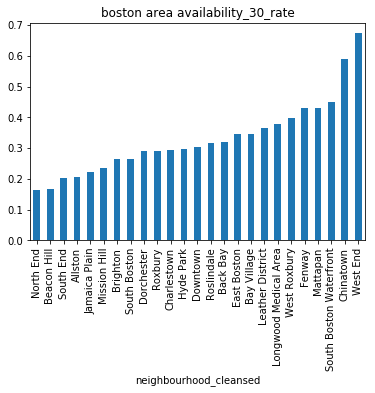

In [153]:
(availability['availability_30_rate']).plot(kind="bar");
plt.title("boston area availability_30_rate");

**Availability VS Price**

Here, we will plot the area data to see how the availability correlate with the price

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


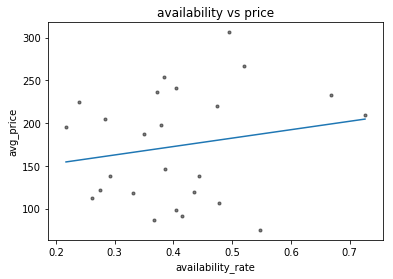

In [48]:
# Plot
colors = (0,0,0)
area = np.pi*3
x=availability['availability_60_rate']
y=availability['price_float']
plt.scatter(x,y , s=area, c=colors, alpha=0.5)
plt.title('availability vs price')
plt.xlabel('availability_rate')
plt.ylabel('avg_price')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

##### Evaluate the Results

From the first chart, it can be concluded that North End,Beacon Hill, South End has the least availability

From the second chart, we can conclude that the availability positively correlate with price if splitted by location.
The least available area usually have lower price listing. This is might caused by high demand of lower price.
